Found 37094 images belonging to 25 classes.
Following is our prediction:
1/1 [==============================] - 0s 125ms/step


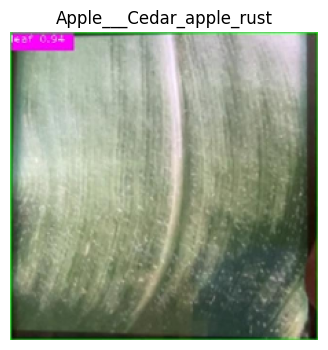

SystemExit: 0

/Users/resit/anaconda3/envs/BitkiHastalikT/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import cv2
import cvzone
import time
from matplotlib import pyplot as plt
from ultralytics import YOLO
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np
from PIL import Image
import tensorflow as tf
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
from PIL import Image
from aifc import Error
import sqlite3
import sys
from PyQt5.QtWidgets import QApplication, QLabel, QVBoxLayout, QWidget, QPushButton,QSizePolicy, QTextEdit
from PyQt5.QtGui import QPixmap, QFont, QIcon
from PyQt5.QtCore import Qt
from keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.load_model('alexnet_model.h5')

train_dir = "dataset/train"
train_datagen_aug = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   fill_mode="nearest",
                                   rotation_range = 20,
                                   width_shift_range=0.2,
                                    height_shift_range=0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2) # set validation split
training_set_aug = train_datagen_aug.flow_from_directory(directory= train_dir,
                                               target_size=(224, 224), # As we choose 64*64 for our convolution model
                                               batch_size=128,
                                               class_mode='categorical',
                                               subset='training')

class_dict = training_set_aug.class_indices
li = list(class_dict.keys())

image_path = "yaprak.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]
        sqlİndex = index



def veri_tabanindan_veri_cek():
    try:
        # SQLite veritabanına bağlantı oluştur
        baglanti = sqlite3.connect('bitki_veritabani.db')
        cursor = baglanti.cursor()

        # Veritabanından hastalıkları çek
        cursor.execute("SELECT hastalik_adi FROM hastaliklar")
        hastaliklar = [row[0] for row in cursor.fetchall()]

        # Veritabanından açıklamaları çek
        cursor.execute("SELECT Açıklama FROM hastaliklar")
        aciklamalar = [row[0] for row in cursor.fetchall()]

        # Veritabanından tedavileri çek
        cursor.execute("SELECT Tedavi FROM hastaliklar")
        tedaviler = [row[0] for row in cursor.fetchall()]

        # Veritabanı bağlantısını kapat
        baglanti.close()

        return hastaliklar, aciklamalar, tedaviler
    except sqlite3.Error as hata:
        print("Veritabanı Hatası:", hata)
        return None, None, None

# Fonksiyonu çağırarak verileri al
hastaliklar, aciklamalar, tedaviler = veri_tabanindan_veri_cek()

hastalik_ismi = hastaliklar[sqlİndex] 
aciklama_ismi = aciklamalar[sqlİndex] 
tedavi_ismi = tedaviler[sqlİndex]

# Sonuçları göstermek için PyQt5 penceresi oluşturma
app = QApplication(sys.argv)
window = QWidget()
window.setWindowTitle("Bitki Hastalığı Tespiti Sonuçları")
window.setWindowIcon(QIcon("path/to/your/icon.png"))  # İstediğiniz ikonu belirtin

# Pencere içeriği için düzen oluşturma
layout = QVBoxLayout()

# "yaprak.png" görüntüsünü yükleyin ve boyutunu küçültün
image_path = "yaprak.JPG"
img = Image.open(image_path)
img = img.resize((640, 480))  # Yeni boyutu burada ayarlayabilirsiniz
img.save("yaprak.JPG")

# Yeni boyutlu görüntüyü PyQt5 penceresine ekleyin
label_image = QLabel()
pixmap = QPixmap("yaprak.JPG")
label_image.setPixmap(pixmap)
label_image.setAlignment(Qt.AlignCenter)
layout.addWidget(label_image)

# Hastalık bilgisini ekleyin
font = QFont()
font.setPointSize(14)

label_hastalik = QLabel(f"Hastalık: {hastalik_ismi}")
label_hastalik.setFont(font)
label_hastalik.setAlignment(Qt.AlignCenter)
layout.addWidget(label_hastalik)

# Açıklama metnini ekleyin (QTextEdit kullanıyoruz)
text_edit_aciklama = QTextEdit()
text_edit_aciklama.setFont(font)
text_edit_aciklama.setPlainText(aciklama_ismi)
text_edit_aciklama.setReadOnly(True)  # Metni düzenlemeyi engelliyoruz
layout.addWidget(text_edit_aciklama)

# Tedavi bilgisini ekleyin
label_tedavi = QLabel(f"Tedavi: {tedavi_ismi}")
label_tedavi.setFont(font)
label_tedavi.setAlignment(Qt.AlignCenter)
layout.addWidget(label_tedavi)

# Pencereyi düzene ekleme ve gösterme
window.setLayout(layout)
window.show()
#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)

plt.show()


sys.exit(app.exec_())